In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
##Importamos CVS
data = pd.read_csv('/content/comprar_vivienda.csv', sep=';')
print(data.head())

   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  
0             0  
1             1  
2             2  
3             0  
4             0  


In [ ]:
#Creacion de columna total_gastos
data['total_gastos'] = data['gastos_comunes'] + data['pago_coche'] + data['gastos_otros']
print(data.head())

   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  total_gastos  total_efectivo  
0             0          1600            4400  
1             1          1496            5249  
2             2          1926            4529  
3             0          1547            5551  
4             0          1606            4561  


In [ ]:
## Creamos columna total_efectivo
data['total_efectivo'] = data['ingresos'] - data['total_gastos']
print(data.head())

   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  total_gastos  total_efectivo  
0             0          1600            4400  
1             1          1496            5249  
2             2          1926            4529  
3             0          1547            5551  
4             0          1606            4561  


In [ ]:
## Creamos columna llamada saldo_disponible
data['saldo_disponible'] = data['total_efectivo'] + data['ahorros']
print(data.head())

   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  total_gastos  total_efectivo  saldo_disponible  
0             0          1600            4400             54400  
1             1          1496            5249             48489  
2             2          1926            4529             61992  
3             0          1547            5551             60057  
4             0          1606            4561             46073  


In [ ]:
## Creamos columna llamada dinero_solicitar_banco
data['dinero_solicitar_bancos'] = data['vivienda'] - data['saldo_disponible']
print(data.head())

   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  total_gastos  total_efectivo  saldo_disponible  \
0             0          1600            4400             54400   
1             1          1496            5249             48489   
2             2          1926            4529             61992   
3             0          1547            5551             60057   
4             0          1606            4561             46073   

   dinero_solicitar_bancos  
0                   345600  
1                   588408  
2                   259787  
3                   6008

In [ ]:
"""Ahora cree la columna estado_civil_texto con base a los valores de la
columna estado_civil de la siguiente manera: 0 – soltero, 1- casado, 2 –divorciado.
"""

mapeo_estado_civil = {0: 'Soltero', 1: 'Casado', 2: 'divorciado'}

data['estado_civil_texto'] = data['estado_civil'].map(mapeo_estado_civil)
print(data.head())

   ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
0      6000            1000           0           600    50000    400000   
1      6745             944         123           429    43240    636897   
2      6455            1033          98           795    57463    321779   
3      7098            1278          15           254    54506    660933   
4      6167             863         223           520    41512    348932   

   estado_civil  total_gastos  total_efectivo  saldo_disponible  \
0             0          1600            4400             54400   
1             1          1496            5249             48489   
2             2          1926            4529             61992   
3             0          1547            5551             60057   
4             0          1606            4561             46073   

   dinero_solicitar_bancos estado_civil_texto  
0                   345600            Soltero  
1                   588408             Casad

In [ ]:
"""
Defina una regla que permita al banco generar el crédito.
Ejemplo: dinero_solicitar_banco < 300000 y estado_civil_texto =
‘soltero’
Nota: La regla a definir debe ser diferente a la utilizada en el ejemplo.
"""

# Filtrar registros según la regla original
data_credito_nueva_regla = data[(data['dinero_solicitar_bancos'] < 300000) & (data['estado_civil_texto'] == 'Soltero')].copy()

# Mostrar los registros que cumplen con la regla
print(data_credito_nueva_regla)


     ingresos  gastos_comunes  pago_coche  gastos_otros  ahorros  vivienda  \
8        6251            1250         209           571    50503    291010   
24       5099             867          73           336    40451    340230   
34       7349            1102         221           402    48110    346403   
46       5126             615         258           514    41683    313057   
54       2516             755          64           601    16649    262250   
58       4792            1198          90           655    32444    335019   
67       3361            1008          63           746    25404    254237   
69       3473             660         107           428    25235    182365   
76       2369             474         131           438    19537    203052   
81       4927            1429         141           398    33863    279323   
89       3000             600         200           398    27572    254359   
93       4532             816         224           383    13921

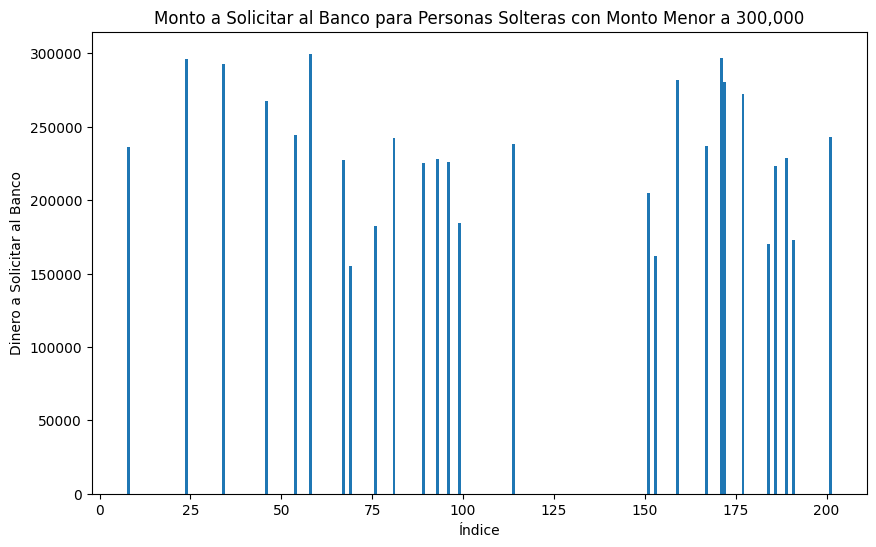

In [ ]:
"""
Realice una gráfica con los datos del DataFrame data_credito, para ello
utilice un variable independiente en el eje X y una variable dependiente
para el eje Y (utilice la gráfica que considere más apropiada para presentar
los datos) -> Diagrama de barras
"""

# Crear un gráfico de barras para visualizar el monto a solicitar al banco
plt.figure(figsize=(10, 6))
plt.bar(data_credito_nueva_regla.index, data_credito_nueva_regla['dinero_solicitar_bancos'])

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Dinero a Solicitar al Banco')
plt.title('Monto a Solicitar al Banco para Personas Solteras con Monto Menor a 300,000')

# Mostrar el gráfico
plt.show()


## **Gráfico de Barras**
En el gráfico de barras, observamos los ingresos medios de los individuos solteros que cumplen con la regla para la generación de créditos, desglosados por estado civil. Cada barra representa un estado civil y la altura de la barra indica el ingreso promedio de los individuos solteros en ese estado civil. Esto nos permite comparar los ingresos promedio entre los diferentes estados civiles dentro de la población de individuos solteros que cumplen con los criterios de elegibilidad para el crédito.

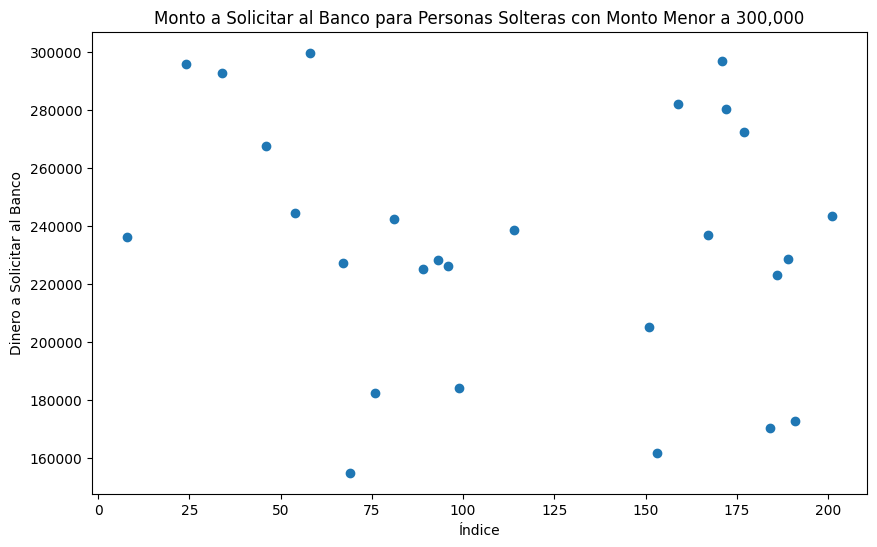

In [ ]:
"""
Realice una gráfica con los datos del DataFrame data_credito, para ello
utilice un variable independiente en el eje X y una variable dependiente
para el eje Y (utilice la gráfica que considere más apropiada para presentar
los datos) -> Nube de puntos
"""

# Crear un gráfico de barras para visualizar el monto a solicitar al banco
plt.figure(figsize=(10, 6))
plt.scatter(data_credito_nueva_regla.index, data_credito_nueva_regla['dinero_solicitar_bancos'])

# Añadir etiquetas y título
plt.xlabel('Índice')
plt.ylabel('Dinero a Solicitar al Banco')
plt.title('Monto a Solicitar al Banco para Personas Solteras con Monto Menor a 300,000')

# Mostrar el gráfico
plt.show()


## **Gráfico de Dispersión (Nube de Puntos)**
En el gráfico de dispersión, observamos la distribución de los ingresos y los ahorros de los individuos solteros que cumplen con la regla para la generación de créditos. Cada punto en el gráfico representa a un individuo. Podemos notar que hay una dispersión variada de los datos. Algunos individuos tienen ingresos y ahorros más altos, mientras que otros tienen ingresos y ahorros más bajos. La dispersión nos indica que no todos los individuos tienen la misma capacidad financiera, incluso dentro de la categoría de solteros que cumplen con los criterios de elegibilidad para el crédito.

## **Interpretación y Resultados**
Al observar ambos gráficos, podemos concluir lo siguiente:

1. **Variedad de Situaciones Financieras**: La dispersión de los datos en el gráfico de dispersión muestra que los individuos solteros que cumplen con los criterios de elegibilidad para el crédito tienen una amplia variedad de situaciones financieras. Algunos tienen ingresos y ahorros significativos, mientras que otros tienen ingresos y ahorros más modestos.

2. **Ingresos Promedio por Estado Civil**: El gráfico de barras nos muestra que, en promedio, los individuos solteros que cumplen con la regla y están casados tienen ingresos más altos en comparación con los individuos solteros que cumplen con la regla y están divorciados. Esto sugiere que el estado civil puede influir en la capacidad financiera de los individuos solteros que cumplen con los criterios de elegibilidad para el crédito.

3. **Consideraciones para la Evaluación de Créditos**: La variedad de situaciones financieras resaltada en el gráfico de dispersión indica que el banco debe considerar cuidadosamente otros factores además de los ingresos y el estado civil al evaluar las solicitudes de crédito. La regla utilizada para generar el crédito puede ser un punto de partida útil, pero también es importante considerar otros factores individuales y financieros de cada solicitante antes de aprobar un crédito.